# 全链接层实现手写数字识别,tensorflow版本

可用设备： [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-03-13 20:25:16.980648: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-13 20:25:16.980672: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-13 20:25:16.980678: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-13 20:25:16.980707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-13 20:25:16.980720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10
  1/375 [..............................] - ETA: 2:01 - loss: 2.5041 - accuracy: 0.0781

2025-03-13 20:25:17.405072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 10ms/step - loss: 0.4040 - accuracy: 0.8809 - val_loss: 0.2186 - val_accuracy: 0.9390
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2349 - accuracy: 0.9305 - val_loss: 0.1701 - val_accuracy: 0.9523
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1969 - accuracy: 0.9406 - val_loss: 0.1525 - val_accuracy: 0.9564
Epoch 4/10
375/375 [==============================] - 4s 9ms/step - loss: 0.1752 - accuracy: 0.9477 - val_loss: 0.1370 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1613 - accuracy: 0.9511 - val_loss: 0.1249 - val_accuracy: 0.9630
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1515 - accuracy: 0.9528 - val_loss: 0.1211 - val_accuracy: 0.9632
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1446 - accuracy: 0.9572 - val_loss: 0.1175 - val_accuracy: 0.9650
Epoch 8/10


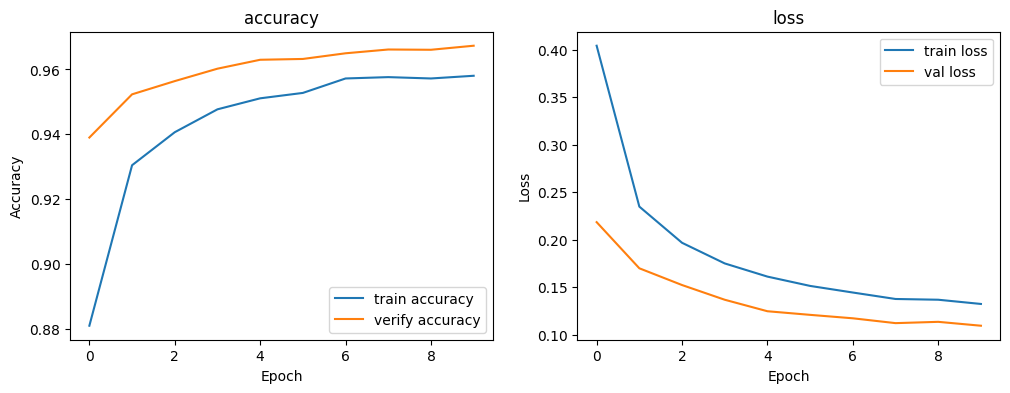

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import matplotlib.pyplot as plt

print("可用设备：", tf.config.list_physical_devices())

# 加载mnist数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# 处理x数据，mnist数据集为灰度图片，范围为0-255，直接除以255，等同归一化
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# 处理y数据，mnist数据集为0-9的数字，需要将其转换为one-hot编码
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# 构建神经网络
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu',input_shape=(28*28,)),
        layers.Dropout(0.2),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ]
)

# 编译模型 自适应矩估计
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型，验证集比例为0.2(帮助adam判断是否需要调整参数)，训练10轮
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

test_loss,test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc:.4f}')

#plt绘制
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='verify accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
